Classification of Forest Cover Type Project

libraries and models

In [1]:
# data analysis
import pandas as pd
import numpy as np

# data ploting 
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing and featuer selection
from mrmr import mrmr_classif
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
# spliting data
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('Data/covtype.csv') # load the data from the file.

In [3]:
df.head() # to take a look on data.

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.shape # 581012 rows and 55 columns.

(581012, 55)

In [5]:
df.isna().sum() # to ckeck for Nan or missing values.

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [6]:
df.info() # the data type for the columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


Data Preprocessing and Analysis

In [1]:
# since there is no missing values so this process is unnecessarily, 

# for coln in df: # this for loop remove any column that have only on value, 
#     if len(df[coln].value_counts().tolist()) == 1:
#         df.drop(columns = coln, axis = 1, inplace = True )

# df = df.dropna(how = 'all') # to remove rows with all Nan values
# df = df.dropna(axis = 1, how = 'all') # to remove columns with all Nan values
# df.shape

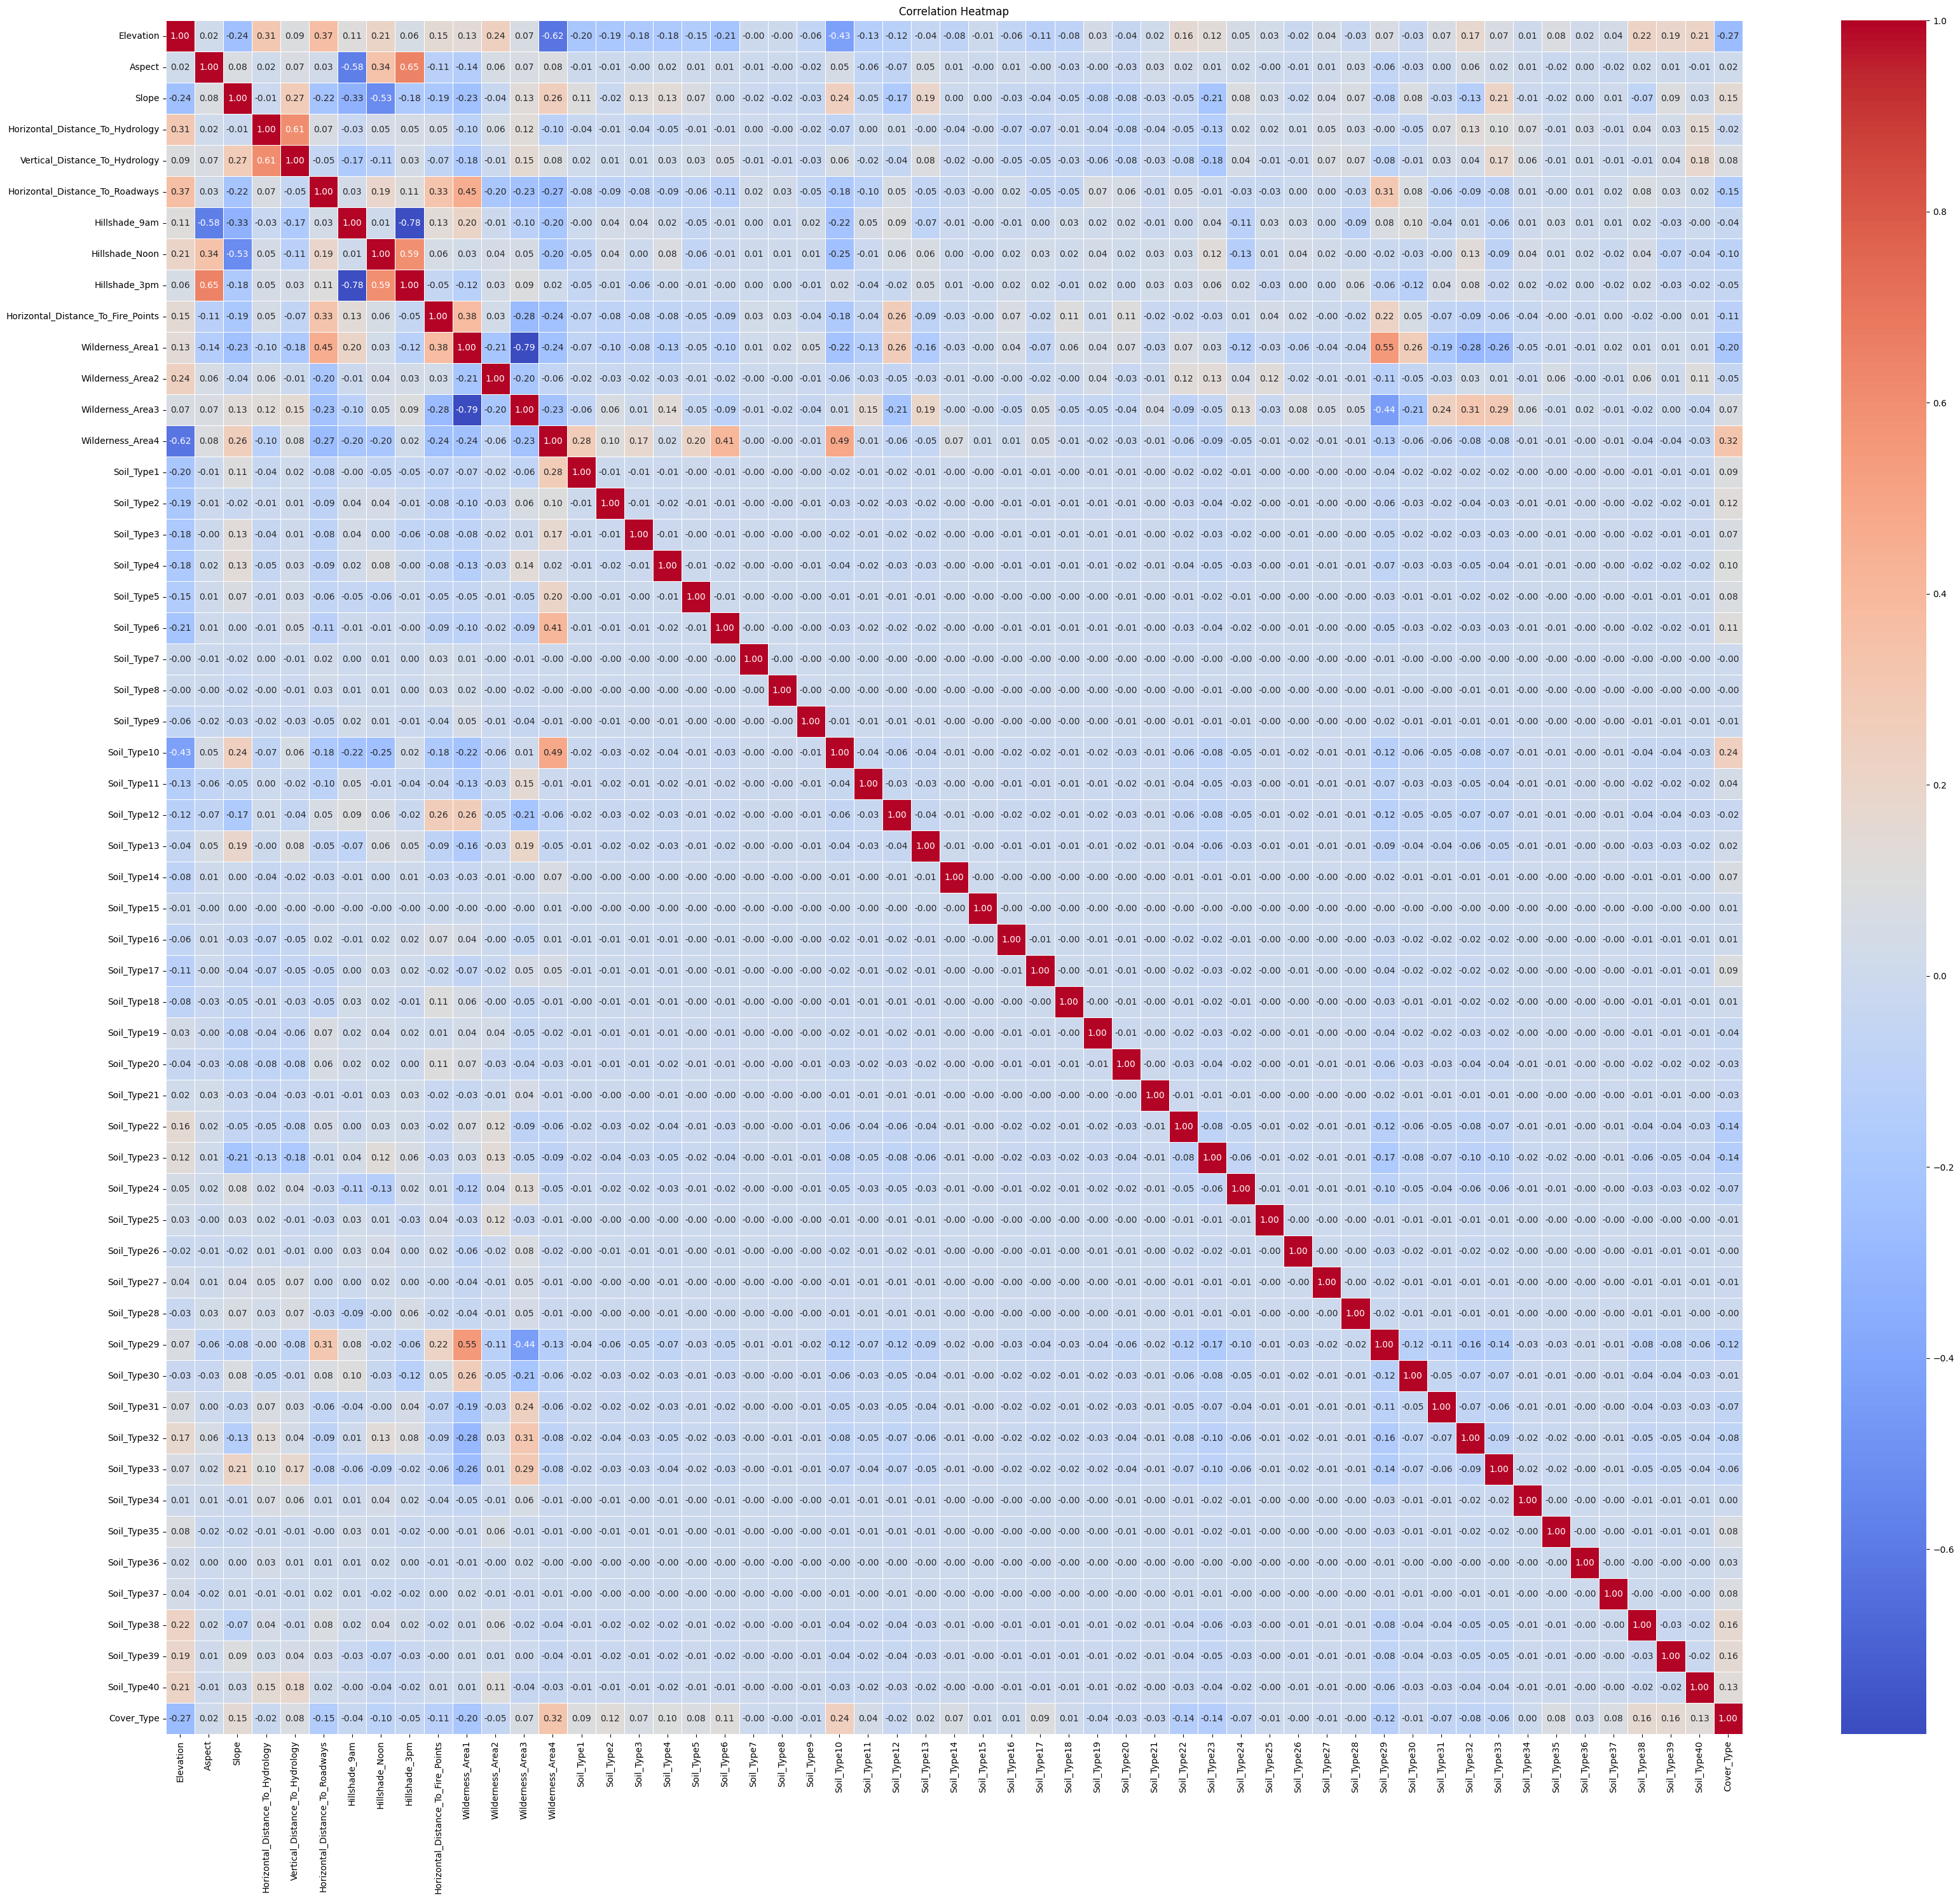

In [10]:
# to take a look on the correlation between columns.

correlation_matrix = df.corr()

plt.figure(figsize=(40, 35)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
# choosing the features based on correlation with the target

# list_of_selected_features = list()

# target_correlation = correlation_matrix['Cover_Type'].drop('Cover_Type') # drop the correlation between the target column
#                                                                          # and itself.
# for feature, corr_value in target_correlation.items(): # the point of this for loop to find the most features that have
#                                                        # correlation with the target. 
#     if abs(corr_value) >= 0.33:
#         list_of_selected_features.append(feature)
        
# list_of_selected_features

# Since there is not much correlation in almost all features, I decided to use another method.

In [12]:
# selecting the features with mrmr method 
X = df.drop(columns = ['Cover_Type'])
y = df['Cover_Type']

selected_features = mrmr_classif(X=X, y=y, K= 8) # best 8 features
selected_features


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:07<00:00,  1.09it/s]


['Elevation',
 'Wilderness_Area4',
 'Soil_Type4',
 'Soil_Type39',
 'Soil_Type38',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type10']

In [13]:
# new data with only the best features and the target column
new_df = df[selected_features].copy() 
new_df['Cover_Type'] = y
new_df.head()

,Elevation,Wilderness_Area4,Soil_Type4,Soil_Type39,Soil_Type38,Soil_Type2,Soil_Type3,Soil_Type10,Cover_Type
0,2596,0,0,0,0,0,0,0,5
1,2590,0,0,0,0,0,0,0,5
2,2804,0,0,0,0,0,0,0,2
3,2785,0,0,0,0,0,0,0,2
4,2595,0,0,0,0,0,0,0,5


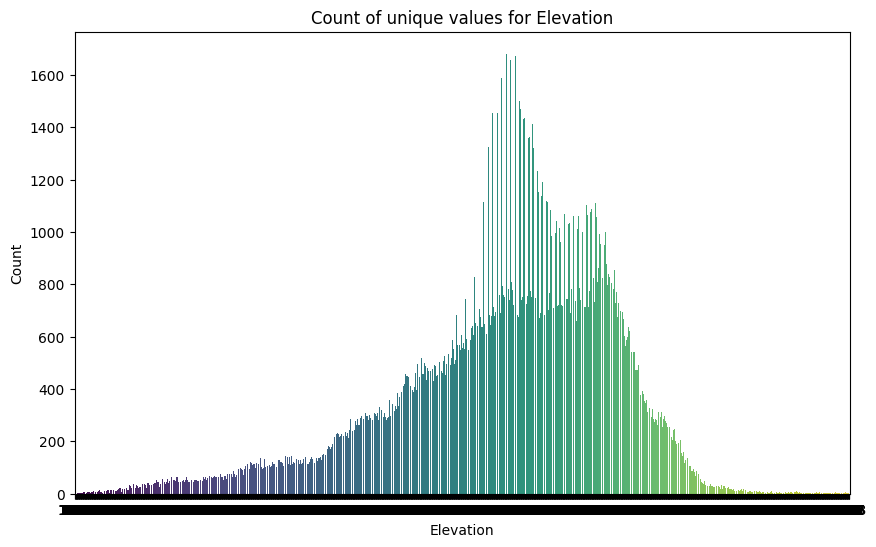

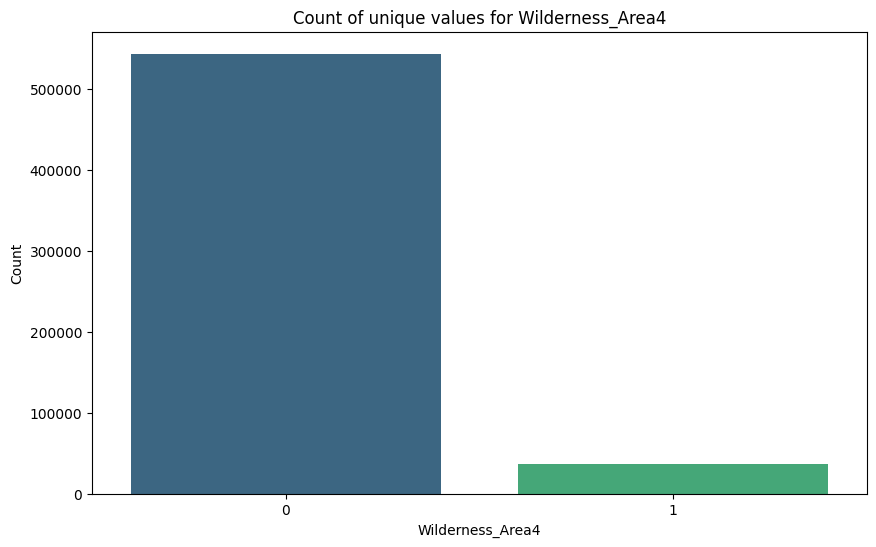

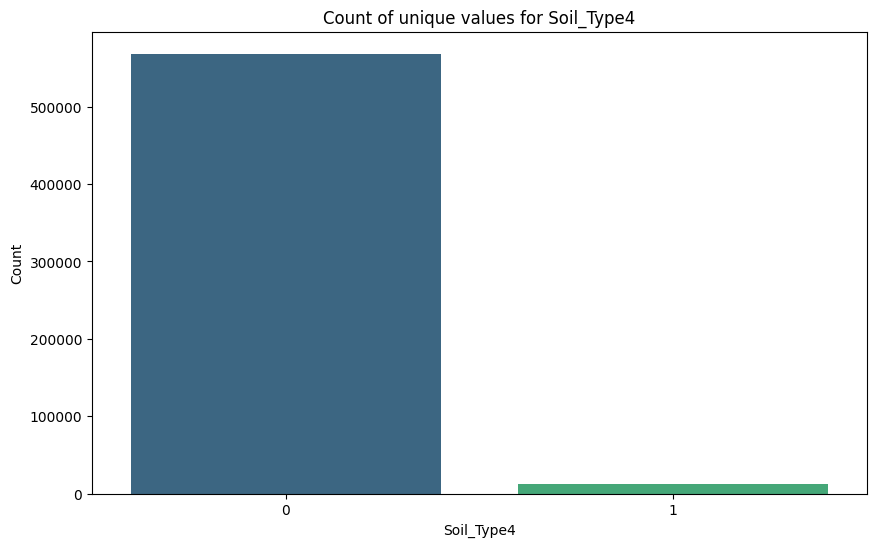

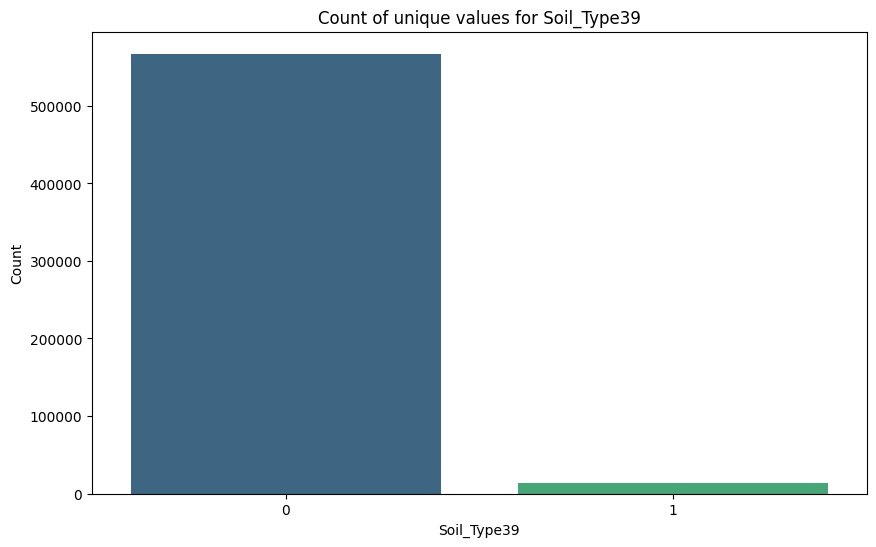

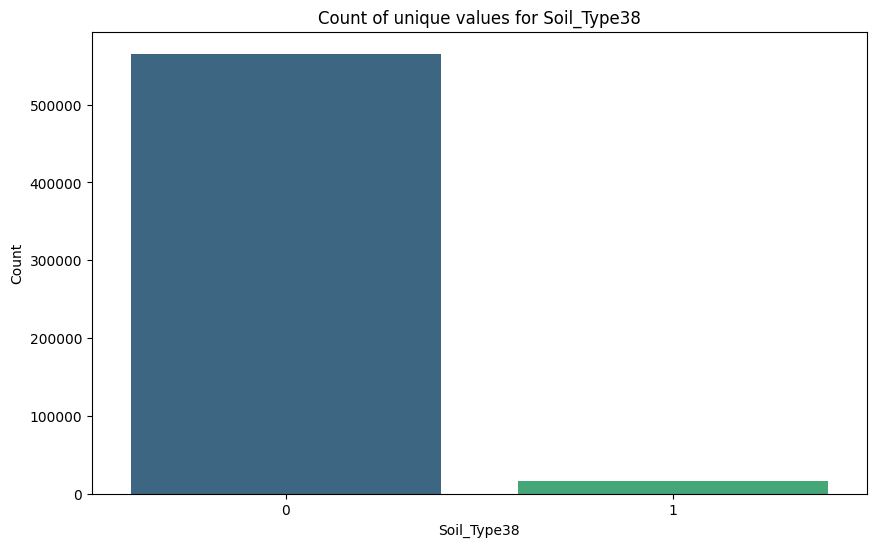

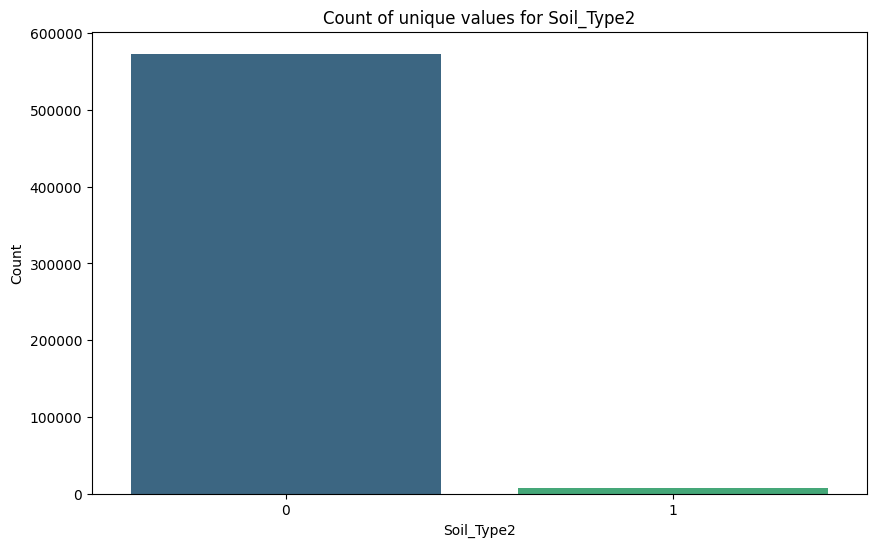

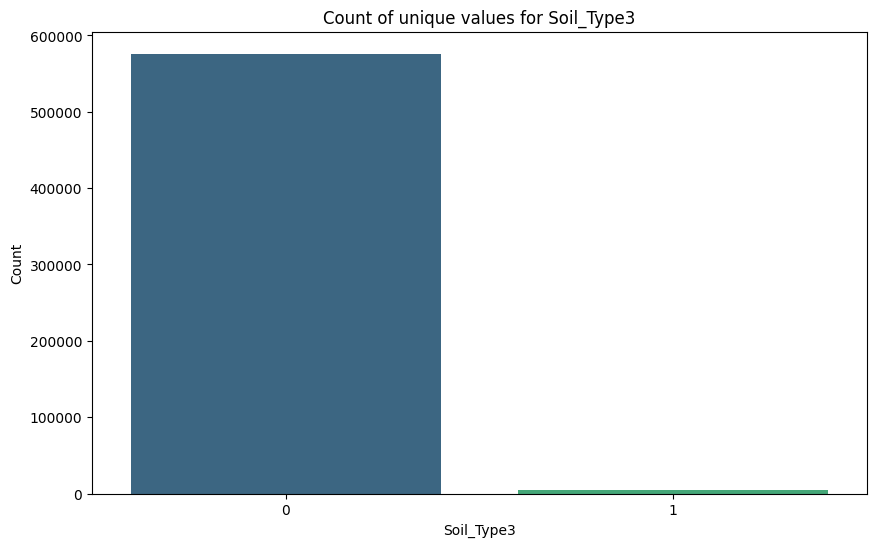

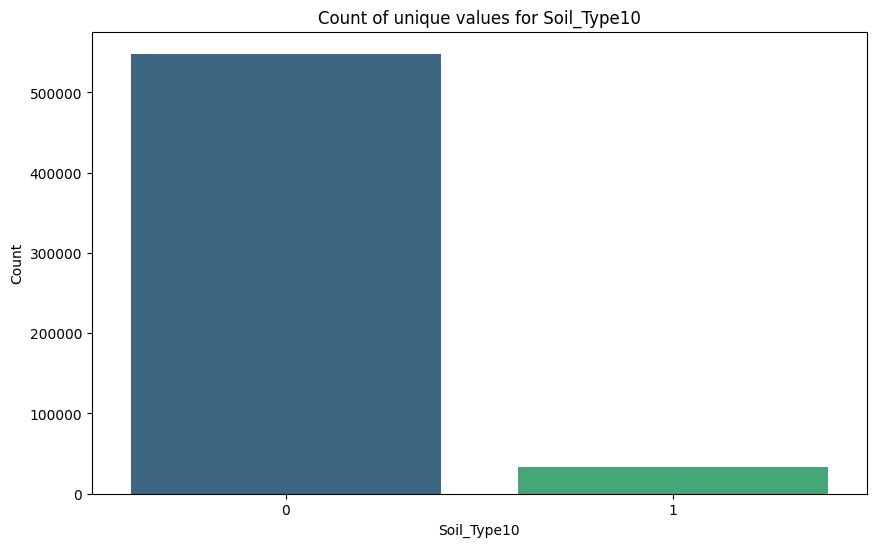

In [14]:
# a plot for every feature values, to check if the data is balanced 

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    
    value_counts = new_df[feature].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis') # bar plot for value counts
    plt.title(f'Count of unique values for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    
    plt.show()

In [15]:
# undersampling for the data, because the data is unbalanced

# rus = RandomUnderSampler(sampling_strategy={class_label: 1500 for class_label in new_df['Cover_Type'].unique()}, random_state=42)
# ros = RandomOverSampler(sampling_strategy={class_label: 2200 for class_label in new_df['Cover_Type'].unique()}, random_state=42)

# X_undersampled, y_undersampled = rus.fit_resample(new_df[selected_features], new_df['Cover_Type'])
# X_undersampled, y_undersampled = ros.fit_resample(X_undersampled, y_undersampled)

# I noticed that this method reduced accuracy, as the data was much smaller.

X_, y_ = new_df[selected_features], new_df['Cover_Type'] ####

under_samp_df = X_.copy()
under_samp_df['Cover_Type'] = y_

under_samp_df.shape

(581012, 9)

In [16]:
# to see the data after the undersampling, oversampling

# for feature in selected_features:
#     plt.figure(figsize=(10, 6))
    
#     value_counts = under_samp_df[feature].value_counts()
#     sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis') # bar plot for value counts
#     plt.title(f'Count of unique values for {feature}')
#     plt.xlabel(feature)
#     plt.ylabel('Count')
    
#     plt.show()

In [17]:
under_samp_df.drop(columns= ['Soil_Type2', 'Soil_Type39', 'Soil_Type39', 'Soil_Type3'], inplace= True)
features_to_train = under_samp_df.drop(columns = 'Cover_Type').columns
under_samp_df


,Elevation,Wilderness_Area4,Soil_Type4,Soil_Type38,Soil_Type10,Cover_Type
0,2596,0,0,0,0,5
1,2590,0,0,0,0,5
2,2804,0,0,0,0,2
3,2785,0,0,0,0,2
4,2595,0,0,0,0,5
...,...,...,...,...,...,...
581007,2396,0,0,0,0,3
581008,2391,0,0,0,0,3
581009,2386,0,0,0,0,3
581010,2384,0,0,0,0,3


Feature Scaling 

In [18]:
# applying the StandardScaler for features, to increase the model performance

scaler = StandardScaler()
under_samp_df[features_to_train] = scaler.fit_transform(under_samp_df[features_to_train])
under_samp_df.head()

,Elevation,Wilderness_Area4,Soil_Type4,Soil_Type38,Soil_Type10,Cover_Type
0,-1.297805,-0.260673,-0.147649,-0.165956,-0.243947,5
1,-1.319235,-0.260673,-0.147649,-0.165956,-0.243947,5
2,-0.554907,-0.260673,-0.147649,-0.165956,-0.243947,2
3,-0.622768,-0.260673,-0.147649,-0.165956,-0.243947,2
4,-1.301377,-0.260673,-0.147649,-0.165956,-0.243947,5


Data Splitting

In [19]:
# train test split 

X_train, X_test, y_train, y_test = train_test_split(under_samp_df[features_to_train], under_samp_df['Cover_Type'], test_size=0.20, random_state=42)

Multiple Classification Algorithms


In [21]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "k-Nearest Neighbors": KNeighborsClassifier()
}

results = dict()

for name, model in models.items():
    
    model.fit(X_train, y_train) # train the model 
    y_pred = model.predict(X_test) # test the model 
    
# calculate metrics
    accuracy = accuracy_score(y_test, y_pred)  
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

best_model_Acc_name = max(results, key=lambda name: results[name]["Accuracy"])
best_model_Pre_name = max(results, key=lambda name: results[name]["Precision"])
best_model_rec_name = max(results, key=lambda name: results[name]["Recall"])
best_model_F1_name = max(results, key=lambda name: results[name]["F1-score"])
res_df = pd.DataFrame(results)
res_df

,Logistic Regression,Decision Tree,Random Forest,k-Nearest Neighbors
Accuracy,0.679285,0.681850,0.681712,0.636963
Precision,0.657385,0.662951,0.665587,0.626127
Recall,0.679285,0.681850,0.681712,0.636963
F1-score,0.660619,0.667740,0.668273,0.626660


In [22]:
print(f'best model based on accuracy {best_model_Acc_name} with accuracy = {results[best_model_Acc_name]['Accuracy']}')
print(f'best model based on precision {best_model_Pre_name} with accuracy = {results[best_model_Pre_name]['Precision']}')
print(f'best model based on recall {best_model_rec_name} with accuracy = {results[best_model_rec_name]['Recall']}')
print(f'best model based on F1 score {best_model_F1_name} with accuracy = {results[best_model_F1_name]['F1-score']}')

best model based on accuracy Decision Tree with accuracy = 0.6818498661824566
best model based on precision Random Forest with accuracy = 0.665586803056681
best model based on recall Decision Tree with accuracy = 0.6818498661824566
best model based on F1 score Random Forest with accuracy = 0.6682725268384831


Hyperparameter Tuning

In [23]:
d_t_classifier = DecisionTreeClassifier()

params_dt = {
    'criterion': ['gini', 'entropy'], # the quality of a split
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40], # how many splits each branch can have
    'min_samples_split': [2, 5, 10, 15], # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8, 10], # The minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # The number of features to consider when looking for the best split
}


rand_search = RandomizedSearchCV(estimator=d_t_classifier, param_distributions=params_dt, cv=7, scoring='f1_weighted', n_iter=50, n_jobs=-1)

rand_search.fit(X_train, y_train)

# Get best parameters and best score
print("Best Parameters:", rand_search.best_params_)
print("Best F1 Score:", rand_search.best_score_)

Best Parameters: {'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}
Best F1 Score: 0.6706816409925817


In [24]:
r_f_calssifier = RandomForestClassifier()

prams_rf = {
    'n_estimators': [50, 100, 200, 300], # The number of trees in the forest.
    'criterion': ['gini', 'entropy'], # the quality of a split
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40], # The maximum depth of each tree
    'min_samples_split': [2, 5, 10, 15], # Min samples required to split a nod
    'min_samples_leaf': [1, 2, 4, 6, 8, 10] # # Min samples required at a leaf node
}

rand_search = RandomizedSearchCV(estimator=r_f_calssifier, param_distributions=prams_rf, cv=7, scoring='f1_weighted', n_iter=30, n_jobs=-1)

rand_search.fit(X_train, y_train)

# Get best parameters and best score
print("Best Parameters:", rand_search.best_params_)
print("Best F1 Score:", rand_search.best_score_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'entropy'}
Best F1 Score: 0.6709957211858589


In [30]:
best_model = rand_search.best_estimator_ #best model with best prameter

y_pred_best = best_model.predict(X_test) # Predict using the best model

# Calculate metrics for the best model(random forest)
accuracy_best = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred, average="weighted")
best_recall = recall_score(y_test, y_pred, average="weighted")
best_f1 = f1_score(y_test, y_pred, average="weighted")

best_res_rf = {
    'best_Acc': accuracy_best,
    'best_prec': best_precision,
    'best_reca': best_recall,
    'best_f1': best_f1
}

best_res_rf = pd.DataFrame([best_res_rf])
best_res_rf

,best_Acc,best_prec,best_reca,best_f1
0,0.6837,0.626127,0.636963,0.62666


In [ ]:
# there is an error with the hyperparameter tuning, its should increase the results.

And that's it :)